<a href="https://colab.research.google.com/github/sonmanwoo/Hellow_AMP_PJT/blob/main/examples/PyCaret%202%20Regression_for%20AMP%20PJT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyCaret 2 Regression Example For LG Chem
This notebook is created using PyCaret 2.3.1. Last updated : 03-06-2021 (SMW)

In [ ]:
!pip install shap
!pip install pycaret

In [15]:
# check version
from pycaret.utils import version
version()

'2.3.1'

#1.b Loading Dataset for LGCHEM

In [38]:
############ Data Reading for LGCHEM ############
import pandas as pd
url = 'https://raw.githubusercontent.com/sonmanwoo/Hellow_AMP_PJT/main/210603_For%20Seminar%20Data.csv' 
raw_df=pd.read_csv(url,index_col=0)

display(raw_df)

,Y1,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
Time,,,,,,,,,,,,,,,,,,,
2016-10-01 0:00,0.0,7226.0,160,23.7,129.4,118.0,6,40.2,25.9,25.2,13.9,0.0,29.3,806.3,64.7,0.0,8.5,36,31
2016-10-01 8:00,0.0,7226.0,160,23.7,129.4,118.0,6,40.2,25.9,25.2,13.9,0.0,29.3,806.3,64.7,0.0,8.5,36,31
2016-10-01 16:00,0.0,7226.0,160,23.7,129.4,118.0,6,40.2,25.9,25.2,13.9,0.0,29.3,806.3,64.7,0.0,8.5,36,31
2016-10-02 0:00,0.0,7226.0,160,23.7,129.4,118.0,6,40.2,25.9,25.2,13.9,0.0,29.3,806.3,64.7,0.0,8.5,36,31
2016-10-02 8:00,0.0,7226.0,160,23.7,129.4,118.0,6,40.2,25.9,25.2,13.9,0.0,29.3,806.3,64.7,0.0,8.5,36,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 0:00,6.1,5521.6,147,25.8,121.2,132.7,14,38.6,11.4,16.8,10.3,28.9,9.6,811.7,71.5,8.9,10.3,76,29
2021-04-30 8:00,6.3,5492.9,147,25.8,122.1,132.5,14,36.8,13.4,18.7,10.9,28.9,8.5,806.6,72.0,8.8,10.6,76,30
2021-04-30 16:00,6.3,5465.1,147,25.8,122.4,133.6,14,39.1,12.4,19.5,10.3,28.8,8.3,803.2,74.6,8.8,10.8,79,32


In [39]:
# Convert time index + X&Y Split
raw_df.index = pd.to_datetime(raw_df.index)
target_name='Y1'
Raw_X_data = raw_df.iloc[:,raw_df.columns.str.contains('X')].astype(float)
Raw_Y_data = raw_df.loc[:,target_name].astype(float)

# Remove TA Data
from datetime import datetime
X_data=Raw_X_data.drop(Raw_X_data.loc[datetime(2016, 10, 1):datetime(2016, 10, 7)].index)
Y_data=Raw_Y_data.drop(Raw_Y_data.loc[datetime(2016, 10, 1):datetime(2016, 10, 7)].index)
X_data=X_data.drop(X_data.loc[datetime(2019, 3, 2):datetime(2019, 4, 9)].index)
Y_data=Y_data.drop(Y_data.loc[datetime(2019, 3, 2):datetime(2019, 4, 9)].index)
X_data=X_data.drop(X_data.loc[datetime(2019, 6, 6):datetime(2019, 6, 14)].index)
Y_data=Y_data.drop(Y_data.loc[datetime(2019, 6, 6):datetime(2019, 6, 14)].index)

# After 2020 (For Test)
new_data_time=datetime(2020, 1, 1)
X_data_new=X_data.loc[new_data_time:]
Y_data_new=Y_data.loc[new_data_time:]
X_data_old=X_data.drop(X_data.loc[new_data_time:].index)
Y_data_old=Y_data.drop(Y_data.loc[new_data_time:].index)

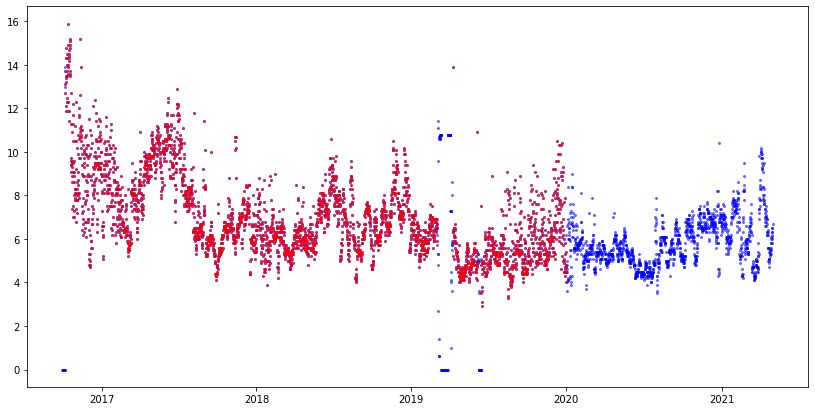

In [40]:
# Check Target Value plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
ax.scatter(Raw_Y_data.index,Raw_Y_data,s=4,alpha=0.5,c='blue')
ax.scatter(Y_data_old.index,Y_data_old,s=4,alpha=0.5,c='red')

# 2. Initialize Setup

In [67]:
from pycaret.regression import *
reg1 = setup(pd.concat([X_data_old,Y_data_old],axis=1), target = target_name, session_id=123, log_experiment=True, experiment_name='insurance1')

,Description,Value
0,session_id,123
1,Target,Y1
2,Original Data,"(3402, 19)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2381, 18)"


# 3. Compare Baseline

In [68]:
top5 = compare_models(fold=5, sort='R2', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5973,0.8195,0.9043,0.7682,0.1079,0.0858,0.916
rf,Random Forest Regressor,0.6544,0.9494,0.9727,0.7325,0.1145,0.0937,1.624
lightgbm,Light Gradient Boosting Machine,0.6652,0.9660,0.9816,0.7271,0.1156,0.0950,0.232
gbr,Gradient Boosting Regressor,0.7547,1.1221,1.0584,0.6830,0.1252,0.1087,0.480
ada,AdaBoost Regressor,1.0576,1.6758,1.2931,0.5265,0.1614,0.1646,0.258
dt,Decision Tree Regressor,0.8578,1.7828,1.3336,0.4975,0.1550,0.1211,0.038
knn,K Neighbors Regressor,0.9656,1.7811,1.3337,0.4956,0.1577,0.1389,0.076
br,Bayesian Ridge,1.0573,2.0297,1.4226,0.4277,0.1650,0.1516,0.018
lr,Linear Regression,1.0572,2.0390,1.4258,0.4250,0.1653,0.1516,0.504
ridge,Ridge Regression,1.0572,2.0390,1.4258,0.4250,0.1653,0.1516,0.020


# 4.a Create Model

In [75]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7261,1.0832,1.0408,0.7315,0.1290,0.1084
1,0.6487,0.8509,0.9224,0.7883,0.1131,0.0962
2,0.6237,0.8511,0.9225,0.7592,0.1071,0.0869
3,0.6675,0.9659,0.9828,0.6689,0.1185,0.0982
4,0.6308,0.9370,0.9680,0.7391,0.1160,0.0915
5,0.6846,1.0801,1.0393,0.6896,0.1175,0.0960
6,0.5836,0.7113,0.8434,0.7891,0.0996,0.0845
7,0.6527,0.8993,0.9483,0.7470,0.1160,0.0935
8,0.6168,0.8656,0.9304,0.7376,0.1109,0.0853
9,0.6474,0.9037,0.9506,0.7488,0.1054,0.0885


#4.b Check Result

Text(0, 0.5, 'Y1')

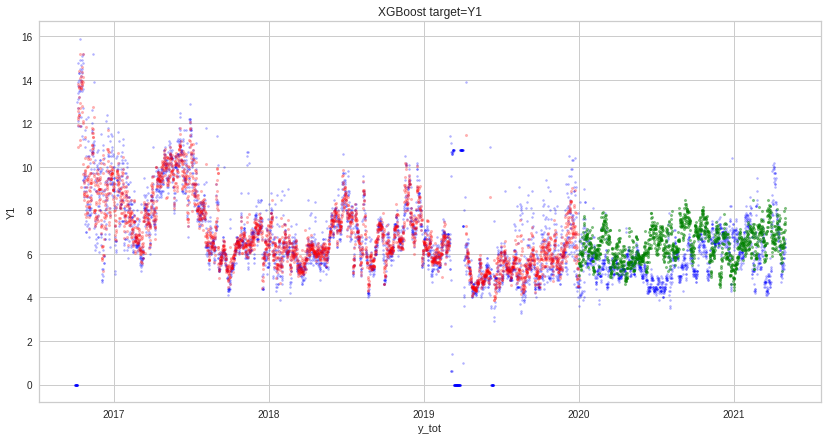

In [106]:
target_model=lightgbm

predict_old = predict_model(target_model, data=X_data_old)
predict_new = predict_model(target_model, data=X_data_new)

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
ax.scatter(Raw_Y_data.index,Raw_Y_data,s=4,alpha=0.3,c='blue')
ax.scatter(predict_old.index,predict_old['Label'],s=4,alpha=0.3,c='red', marker='x')
ax.scatter(predict_new.index,predict_new['Label'],s=4,alpha=0.5,c='green', marker='x')
ax.set_title("XGBoost target="+target_name)
ax.set_xlabel('y_tot')
ax.set_ylabel(target_name)

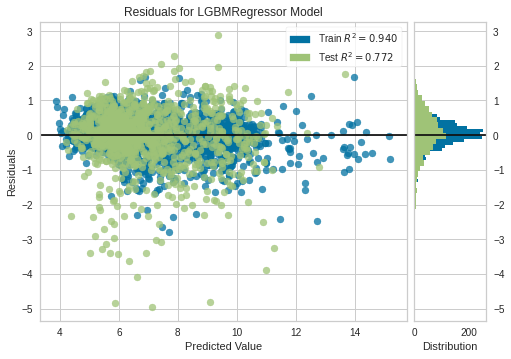

In [107]:
plot_model(lightgbm)

# 5. Tune Hyperparameters

In [ ]:
!pip install optuna

In [78]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7360,1.1004,1.0490,0.7272,0.1290,0.1100
1,0.6524,0.8705,0.9330,0.7834,0.1112,0.0951
2,0.6137,0.7789,0.8825,0.7796,0.1019,0.0859
3,0.6426,0.9144,0.9562,0.6866,0.1161,0.0950
4,0.6031,0.8644,0.9297,0.7593,0.1110,0.0858
5,0.6668,1.0534,1.0263,0.6973,0.1154,0.0933
6,0.5918,0.7065,0.8406,0.7905,0.0985,0.0856
7,0.6768,0.9299,0.9643,0.7383,0.1175,0.0966
8,0.6300,0.8706,0.9330,0.7360,0.1115,0.0876
9,0.6557,0.9126,0.9553,0.7463,0.1062,0.0905


In [77]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'R2', search_library='optuna', early_stopping=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6882,0.9743,0.9871,0.7585,0.1214,0.1014
1,0.6488,0.8704,0.9329,0.7834,0.1127,0.0953
2,0.6014,0.7382,0.8592,0.7912,0.1015,0.0845
3,0.6372,0.8940,0.9455,0.6936,0.1154,0.0945
4,0.6043,0.8497,0.9218,0.7634,0.1110,0.0866
5,0.6488,1.0130,1.0065,0.7089,0.1130,0.0903
6,0.5836,0.7095,0.8423,0.7896,0.0984,0.0839
7,0.6615,0.8856,0.9411,0.7508,0.1158,0.0945
8,0.6216,0.8493,0.9216,0.7425,0.1101,0.0861
9,0.6662,0.9869,0.9934,0.7256,0.1084,0.0904


In [79]:
tuned_lightgbm

LGBMRegressor(bagging_fraction=0.9, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=26, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=160, n_jobs=-1, num_leaves=200, objective=None,
              random_state=123, reg_alpha=0.2, reg_lambda=0.005, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#6. Ensemble Model

In [81]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7261,1.0832,1.0408,0.7315,0.1290,0.1084
1,0.6487,0.8509,0.9224,0.7883,0.1131,0.0962
2,0.6237,0.8511,0.9225,0.7592,0.1071,0.0869
3,0.6675,0.9659,0.9828,0.6689,0.1185,0.0982
4,0.6308,0.9370,0.9680,0.7391,0.1160,0.0915
5,0.6846,1.0801,1.0393,0.6896,0.1175,0.0960
6,0.5836,0.7113,0.8434,0.7891,0.0996,0.0845
7,0.6527,0.8993,0.9483,0.7470,0.1160,0.0935
8,0.6168,0.8656,0.9304,0.7376,0.1109,0.0853
9,0.6474,0.9037,0.9506,0.7488,0.1054,0.0885


In [82]:
bagged_lightgbm = ensemble_model(lightgbm, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7204,1.0571,1.0281,0.7380,0.1255,0.1067
1,0.6531,0.8839,0.9402,0.7801,0.1109,0.0948
2,0.6015,0.7711,0.8781,0.7819,0.1016,0.0840
3,0.6384,0.9238,0.9611,0.6834,0.1170,0.0947
4,0.6020,0.8565,0.9255,0.7615,0.1111,0.0862
5,0.6565,1.0178,1.0089,0.7075,0.1137,0.0918
6,0.5878,0.6805,0.8249,0.7982,0.0975,0.0854
7,0.6602,0.8870,0.9418,0.7504,0.1149,0.0943
8,0.6282,0.8618,0.9284,0.7387,0.1106,0.0875
9,0.6399,0.8937,0.9453,0.7515,0.1043,0.0877


In [83]:
boosted_lightgbm = ensemble_model(lightgbm, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7169,0.9862,0.9931,0.7555,0.1232,0.1074
1,0.6569,0.8738,0.9348,0.7826,0.1132,0.0968
2,0.5934,0.8007,0.8948,0.7735,0.1052,0.0836
3,0.6677,1.0069,1.0035,0.6549,0.1202,0.0995
4,0.6248,0.8560,0.9252,0.7616,0.1119,0.0903
5,0.6874,1.0957,1.0468,0.6851,0.1183,0.0962
6,0.5786,0.6864,0.8285,0.7965,0.0993,0.0850
7,0.6610,0.8359,0.9143,0.7648,0.1127,0.0956
8,0.6467,0.8631,0.9290,0.7383,0.1116,0.0913
9,0.6489,0.8874,0.9420,0.7533,0.1066,0.0906


# 7. Blend Models
알고리즘 마다 특성이 다릅니다.
결과가 우수한 5개의 알고리즘을 Blending하여 Model을 만들어봅시다.


In [101]:
tuned_top5 = [tune_model(i) for i in top5]
blender_top5 = blend_models(estimator_list=tuned_top5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8287,1.2799,1.1313,0.6827,0.1370,0.1234
1,0.7227,0.9813,0.9906,0.7558,0.1183,0.1064
2,0.6936,0.8923,0.9446,0.7476,0.1096,0.0981
3,0.6863,0.9795,0.9897,0.6643,0.1212,0.1030
4,0.7131,0.9978,0.9989,0.7222,0.1192,0.1027
5,0.7494,1.1728,1.0830,0.6629,0.1228,0.1058
6,0.6538,0.7979,0.8932,0.7634,0.1053,0.0957
7,0.7546,1.0464,1.0229,0.7056,0.1243,0.1096
8,0.7037,0.9750,0.9874,0.7044,0.1174,0.0990
9,0.7373,1.0452,1.0223,0.7094,0.1144,0.1031


# 8. Stack Models

In [104]:
stacker = stack_models(estimator_list = tuned_top5[1:], meta_model = tuned_top5[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7514,1.0946,1.0462,0.7286,0.1292,0.1128
1,0.6574,0.8564,0.9254,0.7869,0.1115,0.0969
2,0.6178,0.7635,0.8738,0.7840,0.1021,0.0872
3,0.6432,0.8971,0.9471,0.6925,0.1162,0.0964
4,0.6323,0.8768,0.9364,0.7559,0.1127,0.0916
5,0.6804,1.0754,1.0370,0.6909,0.1170,0.0955
6,0.5901,0.6826,0.8262,0.7976,0.0978,0.0863
7,0.6800,0.9257,0.9621,0.7395,0.1172,0.0982
8,0.6236,0.8484,0.9211,0.7428,0.1111,0.0882
9,0.6608,0.9160,0.9571,0.7453,0.1071,0.0917


# 9. Analyze Model

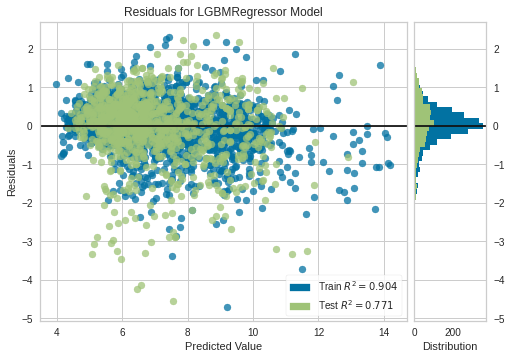

In [108]:
plot_model(tuned_lightgbm)

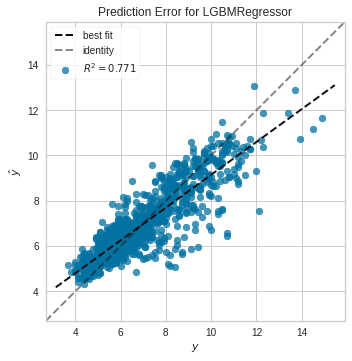

In [109]:
plot_model(tuned_lightgbm, plot = 'error')

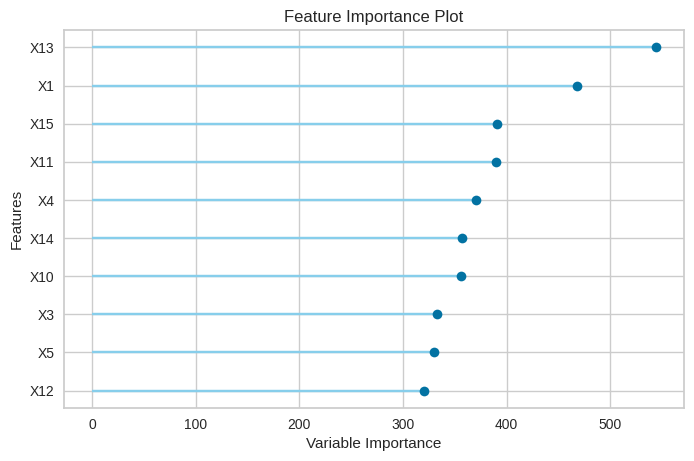

In [110]:
plot_model(tuned_lightgbm, plot = 'feature')

In [111]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

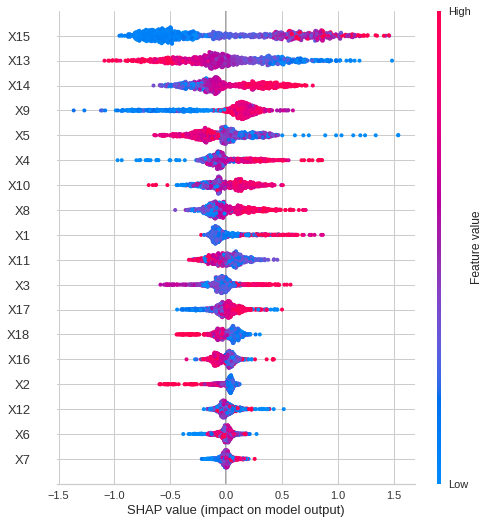

In [112]:
interpret_model(lightgbm)

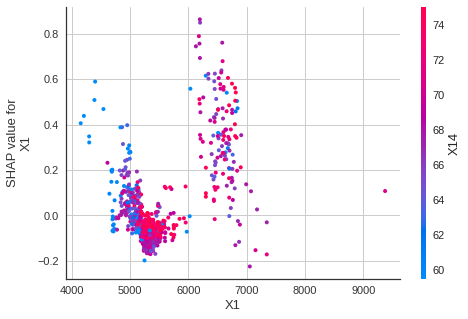

In [113]:
interpret_model(lightgbm, plot = 'correlation')

In [114]:
interpret_model(lightgbm, plot = 'reason', observation = 12)

# 11. AutoML()

In [115]:
best = automl(optimize = 'R2')
best

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

# 13. Save / Load Model

In [116]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Y1',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='mea...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                    

In [117]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Y1',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='mea...
                 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='mse', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     max_samples=None

In [118]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[], ml_usecase='regression',
                     numerical_features=[], target='Y1', time_features=[])

In [119]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [ ]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 15. Get Config / Set Config

In [ ]:
X_train = get_config('X_train')
X_train.head()

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
300,36.0,27.55,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
904,60.0,35.10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
670,30.0,31.57,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
617,49.0,25.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
373,26.0,32.90,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
get_config('seed')

123

In [ ]:
from pycaret.regression import set_config
set_config('seed', 999)

In [ ]:
get_config('seed')

999

# 16. MLFlow UI

In [ ]:
!mlflow ui

[2021-05-27 02:55:16 +0000] [590] [INFO] Starting gunicorn 20.1.0
[2021-05-27 02:55:16 +0000] [590] [INFO] Listening at: http://127.0.0.1:5000 (590)
[2021-05-27 02:55:16 +0000] [590] [INFO] Using worker: sync
[2021-05-27 02:55:16 +0000] [593] [INFO] Booting worker with pid: 593


# 감사합니다~ 주말 잘 보내세요.
<img src=https://cdn.cashfeed.co.kr/attachments/6b626f5bb0.jpg  width="400" height="600">  